# Table of Content
01. Import Libraries
02. Import Data
03. Create and Export Visualizations: 
- (Q3) Simpler price range grouping
- (Q4) Which departments have the highest frequency of product orders?

# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Adjust the setting to view all columns in this notebook
pd.options.display.max_columns = None

# 02. Import Data

In [3]:
# Define the main folder project path
path = r'C:\Users\saich\Desktop\CareerFoundry\Data Immersion\Achievement 4 Python Fundamentals for Data Analysts\04-2023 Instacart Basket Analysis (github)'

In [4]:
# Import 'orders_products_all_flagged' data set from 'Prepared Data' folder
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_flagged.pkl'))

In [5]:
ords_prods_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_order_interval,order_frequency_flag,gender,state,age,date_joined,dependant_counts,family_status,income,_merge,region,customer_profile,income_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income


In [6]:
ords_prods_all.shape

(32399732, 34)

# 03. Create and Export Visualizations

### (Q3) Simpler price range groupings
- 01. Pie chart: proportion of products vs price_range
- 02. Percentage stacked bar chart: number of products vs price_range in each department
- 03. Bar chart: number of orders vs price_range
- 04. Percentage stacked bar chart: price_range vs spender_flag
- 05. Bar chart: no of users vs spender_flag
- 06. Pie chart: proportion of different income users in high spender

#### Q3_01. Pie chart: proportion of products vs price_range

In [8]:
# Find the number of products of each 'price_range'
ords_prods_all.groupby('price_range').agg(product_count = ('product_id', 'nunique'))

,product_count
price_range,
High-range product,545
Low-range product,16291
Mid-range product,32822


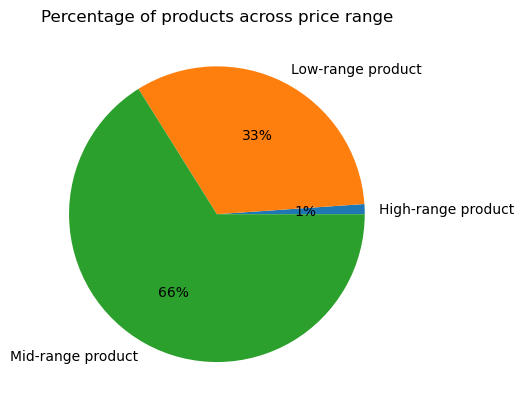

In [10]:
# Create a pie chart based on the frequency table above
pie_prod_count_vs_price_range = ords_prods_all.groupby('price_range').agg(product_count = ('product_id', 'nunique')).plot.pie(y = 'product_count', title = 'Percentage of products across price range', ylabel = '', legend = False, autopct = '%1.0f%%')

In [11]:
# Export pie_prod_count_vs_price_range
pie_prod_count_vs_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q3', 'Q3_01 (pie) prod_count vs price_range.png'))

#### Q3_02: Percentage stacked bar chart: number of products vs price_range in each department

In [12]:
# Find the number of products across different 'price_range' in each department
ct_dept_prod_count_vs_price_range = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['price_range'], values = ords_prods_all['product_id'], aggfunc = 'nunique')
ct_dept_prod_count_vs_price_range

price_range,High-range product,Low-range product,Mid-range product
department_id,,,
1,NaN,1214.0,2792.0
2,NaN,165.0,383.0
3,NaN,417.0,1098.0
4,NaN,483.0,1201.0
5,NaN,295.0,759.0
6,NaN,317.0,822.0
7,NaN,1257.0,3104.0
8,NaN,281.0,690.0
9,NaN,521.0,1337.0


In [13]:
# Convert the values in 'ct_dept_prod_count_vs_price_range' into a percentage of each row
ct_percent_dept_prod_count_vs_price_range = ct_dept_prod_count_vs_price_range.div(ct_dept_prod_count_vs_price_range.sum(axis = 1), axis = 0)
ct_percent_dept_prod_count_vs_price_range

price_range,High-range product,Low-range product,Mid-range product
department_id,,,
1,NaN,0.303045,0.696955
2,NaN,0.301095,0.698905
3,NaN,0.275248,0.724752
4,NaN,0.286817,0.713183
5,NaN,0.279886,0.720114
6,NaN,0.278314,0.721686
7,NaN,0.288237,0.711763
8,NaN,0.289392,0.710608
9,NaN,0.280409,0.719591


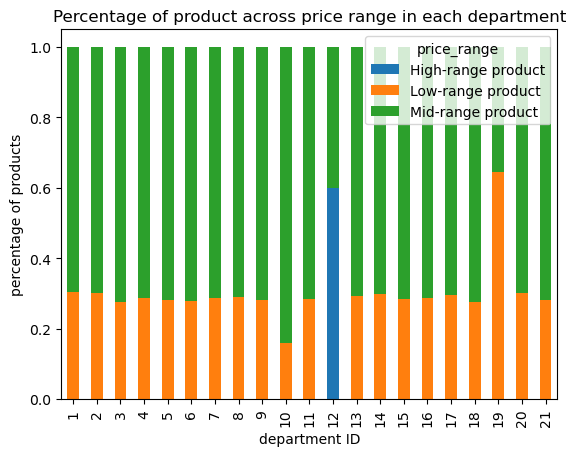

In [14]:
# Create the percentage bar chart of number of products vs price_range in each department
percent_bar_dept_prod_count_vs_price_range = ct_percent_dept_prod_count_vs_price_range.plot.bar(stacked = True, title = 'Percentage of product across price range in each department', xlabel = 'department ID', ylabel = 'percentage of products')

In [15]:
# Export percent_bar_dept_prod_count_vs_price_range
percent_bar_dept_prod_count_vs_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q3', 'Q3_02 (percent bar) dept_prod_count vs price_range.png'))

#### Q3_03. Bar chart: no of orders vs price_range

In [16]:
# Find the number of orders across 'price_range'
ords_prods_all['price_range'].value_counts(dropna = False).sort_index()

High-range product      412551
Low-range product     10126321
Mid-range product     21860860
Name: price_range, dtype: int64

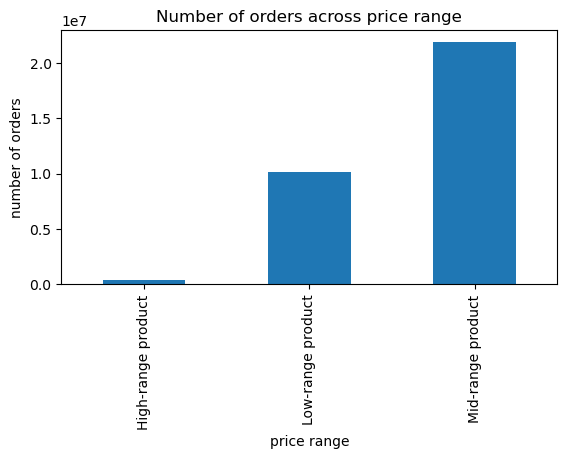

In [17]:
# Create a bar chart based on the frequency table above
bar_order_count_vs_price_range = ords_prods_all['price_range'].value_counts(dropna = False).sort_index().plot.bar(title = 'Number of orders across price range', xlabel = 'price range', ylabel = 'number of orders')
plt.subplots_adjust(bottom = 0.35)

In [18]:
# Export bar_order_count_vs_price_range
bar_order_count_vs_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q3', 'Q3_03 (bar) order_count vs price_range.png'))

#### Q3_04. Percentage stacked bar chart: price_range vs spender_flag

In [19]:
# Find the number of orders of different 'price_range' across different 'spender_flag'
ct_price_range_vs_spender_flag = pd.crosstab(ords_prods_all['spender_flag'], ords_prods_all['price_range'])
ct_price_range_vs_spender_flag

price_range,High-range product,Low-range product,Mid-range product
spender_flag,,,
High spender,8258,16738,94723
Low spender,404293,10109583,21766137


In [20]:
# Convert values in 'ct_price_range_vs_spender_flag' into a percentage of each row
ct_percent_price_range_vs_spender_flag = ct_price_range_vs_spender_flag.div(ct_price_range_vs_spender_flag.sum(axis = 1), axis = 0)
ct_percent_price_range_vs_spender_flag

price_range,High-range product,Low-range product,Mid-range product
spender_flag,,,
High spender,0.068978,0.139811,0.791211
Low spender,0.012525,0.313184,0.674291


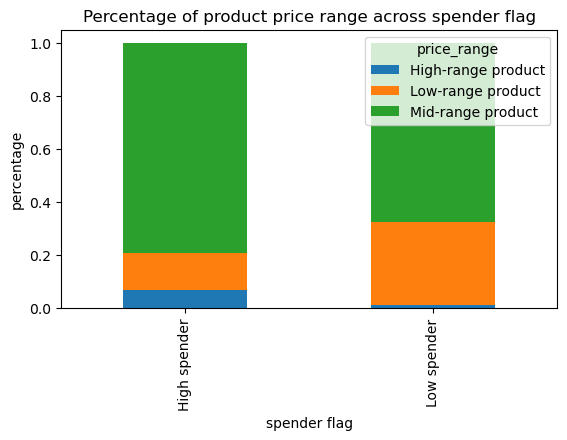

In [22]:
# Create the percentage bar chart of price_range vs spender_flag 
percent_bar_price_range_vs_spender_flag = ct_percent_price_range_vs_spender_flag.plot.bar(stacked = True, title = 'Percentage of product price range across spender flag', xlabel = 'spender flag', ylabel = 'percentage')
plt.subplots_adjust(bottom = 0.30)

In [23]:
# Export percent_bar_price_range_vs_spender_flag
percent_bar_price_range_vs_spender_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q3', 'Q3_04 (percent bar) price_range vs spender_flag.png'))

#### Q3_05. Bar chart: no of users vs spender_flag

In [24]:
# Find the number of users across 'spender_flag'
ords_prods_all.groupby('spender_flag')['user_id'].nunique().sort_index()

spender_flag
High spender      3389
Low spender     202820
Name: user_id, dtype: int64

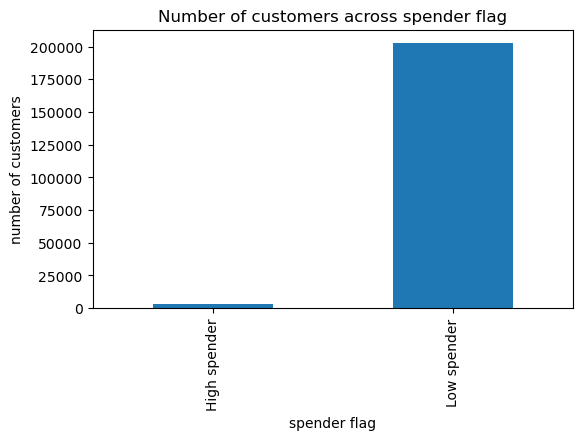

In [25]:
# Create a bar chart based on the frequency table above
bar_user_count_vs_spender_flag = ords_prods_all.groupby('spender_flag')['user_id'].nunique().sort_index().plot.bar(title = 'Number of customers across spender flag', xlabel = 'spender flag', ylabel = 'number of customers')
plt.subplots_adjust(bottom = 0.30, left = 0.15)

In [26]:
# Export bar_user_count_vs_spender_flag
bar_user_count_vs_spender_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q3', 'Q3_05 (bar) user_count vs spender_flag.png'))

#### Q3_06. Pie chart: proportion of different income users in high spender

In [27]:
# Create a sub-dataframe that contains only high spenders
df_high_spender = ords_prods_all.loc[ords_prods_all['spender_flag'] == 'High spender', ['user_id', 'spender_flag', 'income_flag']]

In [28]:
# Ensure the sub-dataframe has only high spenders
df_high_spender['spender_flag'].value_counts(dropna = False)

High spender    119719
Name: spender_flag, dtype: int64

In [29]:
# Find the number of users across different 'income_flag' 
df_high_spender.groupby('income_flag').agg(user_count = ('user_id', 'nunique'))

,user_count
income_flag,
High income,1137
Low income,293
Medium income,1959


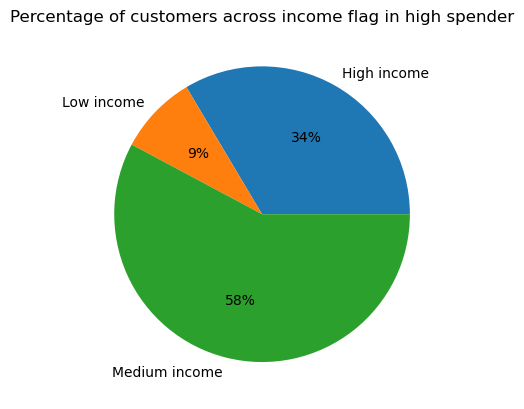

In [30]:
# Create a pie chart of different number of users across different 'income_flag' among high spenders
pie_high_spender_user_count_vs_income_flag = df_high_spender.groupby('income_flag').agg(user_count = ('user_id', 'nunique')).plot.pie(y = 'user_count', title = 'Percentage of customers across income flag in high spender',  ylabel = '', legend = False, autopct = '%1.0f%%')

In [31]:
# Export pie_high_spender_user_count_vs_income_flag
pie_high_spender_user_count_vs_income_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q3', 'Q3_06 (pie) high_spender_user_count_vs_income_flag.png'))

### (Q4) Which departments have the highest frequency of product orders?
- 01. Bar chart: no of orders vs department_id
- 02. Bar chart: no of orders vs department_id (sorted)

#### Q4_01. Bar chart: no of orders vs department_id

In [32]:
# Find the number of orders acorss 'department_id'
ords_prods_all['department_id'].value_counts(dropna = False)

4     9479291
16    5393620
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

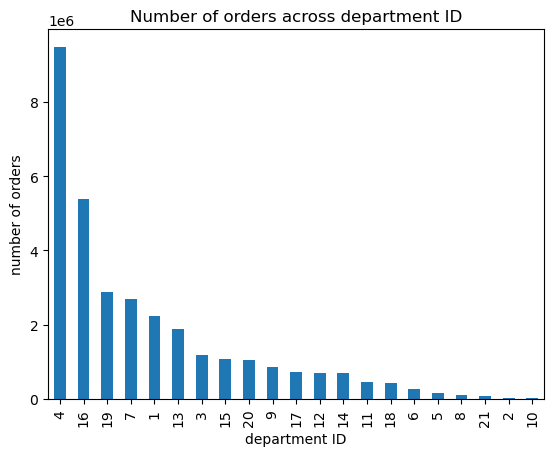

In [33]:
# Create a bar chart based on the frequency table above
bar_order_count_vs_department_id = ords_prods_all['department_id'].value_counts(dropna = False).plot.bar(title = 'Number of orders across department ID', xlabel = 'department ID', ylabel = 'number of orders')

In [34]:
# Export bar_order_count_vs_department_id
bar_order_count_vs_department_id.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q4', 'Q4_01 (bar) order_count vs department_id.png'))

#### Q4_02. Bar chart: no of orders vs department_id (sorted)

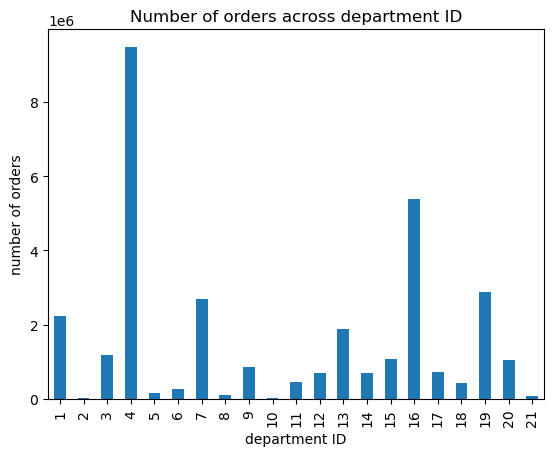

In [35]:
# Create the same bar chart, with the 'department_id' sorted
# This allows easier visual comparison with other charts later
bar_order_count_vs_department_id_sorted = ords_prods_all['department_id'].value_counts(dropna = False).sort_index().plot.bar(title = 'Number of orders across department ID', xlabel = 'department ID', ylabel = 'number of orders')

In [36]:
# Export bar_order_count_vs_department_id_sorted
bar_order_count_vs_department_id_sorted.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q4', 'Q4_02 (bar) order_count vs department_id_sorted.png'))